### KNN Classifier.

In [2]:
%matplotlib inline

#Q1. What is the purpose of the %matplotlib inline command?
Answer: It is used in frontend interactive python development tool like jupyter notebook to display the output graph directly below the executing code cell. The resulting visualisation is also stored in the document.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Q2. import iris dataset Use load_iris function from sklearn.datasets module
#display data
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
#Q3. Display the type of iris data
type(df)

pandas.core.frame.DataFrame

In [7]:
#Q4. print details of dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
#Q5: Display the samples in iris data 
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
83,6.0,2.7,5.1,1.6,1.0
33,5.5,4.2,1.4,0.2,0.0
44,5.1,3.8,1.9,0.4,0.0
80,5.5,2.4,3.8,1.1,1.0
115,6.4,3.2,5.3,2.3,2.0


In [14]:
#Q6. Print the following: feature names, targets and target names
print('Features: \n{}\nTarget: {}'.format(df.columns[:-1], df.columns[-1]))

Features: 
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Target: target


In [15]:
#Q7. Display the types of the features and response
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

### Checking the Sample and Target Sizes

In [19]:
#Q8. Disply number of samples and features in the datase
#(first dimension = number of observations, second dimensions = number of features)
print('Number of samples: {}, Number of features: {}'.format(df.shape[0], df.shape[1]))

Number of samples: 150, Number of features: 5


In [20]:
#Q9. Dispay number of target values(response)
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

### Splitting the Data for Training and Testing 

In [29]:
#Q10: Prepare data by splitting into Training and Testing (70% Training and 30% Testing)
from sklearn.model_selection import train_test_split

Y = df['target']
X = df.drop('target', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

### Training and Testing Set Sizes

In [30]:
#Q11: Display Training and Testing Set Sizes
print('X Train shape: {}, Y Train shape: {}'.format(x_train.shape, y_train.shape))
print('X Test shape: {}, Y Test shape: {}'.format(x_test.shape, y_test.shape))

X Train shape: (105, 4), Y Train shape: (105,)
X Test shape: (45, 4), Y Test shape: (45,)


### Creating the Model 

In [31]:
#Q12: Use KNeighborsClassifier estimator to create the model 
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf = KNeighborsClassifier()

### Training the Model 

In [33]:
#Q13: Train the model
clf.fit(x_train, y_train)

KNeighborsClassifier()

### Predicting Digit Classes 

In [34]:
#Q14: Report your prodictions

y_pred = clf.predict(x_test)

In [35]:
clf.predict_proba(x_test)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


### Estimator Method `score`

In [40]:
#Q15: Print the score
clf.score(x_test, y_test)

1.0

### Confusion Matrix

In [44]:
#Q16: Print confusion matrix

from sklearn.metrics import confusion_matrix

In [45]:
confusion = confusion_matrix(y_test, y_pred)

In [46]:
confusion

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]])

### Classification Report

In [47]:
#Q17: report classification

from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred, target_names = ['virginica', 'setosa', 'versicolor']))

              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        13
      setosa       1.00      1.00      1.00        20
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Visualizing the Confusion Matrix

In [49]:
#Q18: Visualize confusion matrix

from sklearn.metrics import plot_confusion_matrix

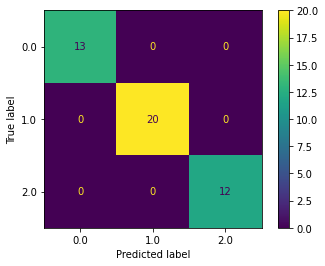

In [50]:
plot_confusion_matrix(clf, x_test, y_test)

### K-Fold Cross-Validation (KFold object) and cross_val_score

In [52]:
#Q19: Perfrom K-Fold Cross-validation with different k values. 

from sklearn.model_selection import cross_val_score

In [53]:
cv = cross_val_score(clf, X, Y, cv = 10)

In [54]:
print(cv)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [55]:
print(round(np.mean(cv), 2))

0.97


In [59]:
for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors = i)
    cv = cross_val_score(clf, X, Y, cv = 10)
    print('n_neighbours: {}, cv score: {}'.format(i, round(np.mean(cv), 2)))

n_neighbours: 1, cv score: 0.96
n_neighbours: 2, cv score: 0.95
n_neighbours: 3, cv score: 0.97
n_neighbours: 4, cv score: 0.97
n_neighbours: 5, cv score: 0.97
n_neighbours: 6, cv score: 0.97
n_neighbours: 7, cv score: 0.97
n_neighbours: 8, cv score: 0.97
n_neighbours: 9, cv score: 0.97
n_neighbours: 10, cv score: 0.97
n_neighbours: 11, cv score: 0.97
n_neighbours: 12, cv score: 0.97
n_neighbours: 13, cv score: 0.98
n_neighbours: 14, cv score: 0.97
n_neighbours: 15, cv score: 0.97
n_neighbours: 16, cv score: 0.97
n_neighbours: 17, cv score: 0.97
n_neighbours: 18, cv score: 0.98
n_neighbours: 19, cv score: 0.97


### Hyperparameter Tuning 

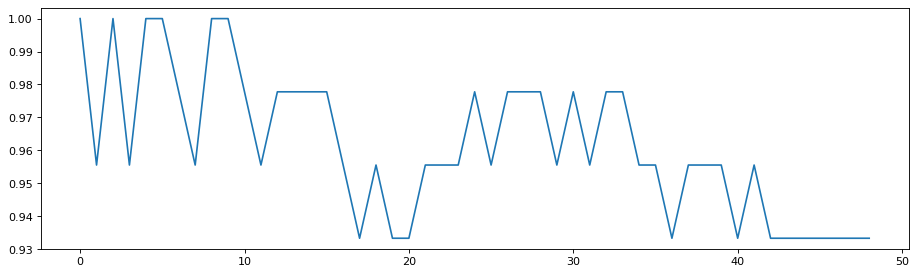

In [62]:
#Q20: What is the best value of k that you would suggest? 
#Hint: Use a for loop to test different values of k

acc_li = []
for i in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc_li.append(accuracy_score(y_test, y_pred))


from matplotlib.pyplot import figure

figure(figsize=(14, 4), dpi=80)
plt.plot(acc_li)

### Somewhere around 10 - 12 should be a good value in order to get good results and also avoid overfitting the training dataset.

### Choosing the Best Estimator - For Graduate Students only

In [63]:
#Q20: Compare knn, SVC(gamma='scale'), and GaussianNB() and display the prediction accuracies.

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [64]:
from sklearn.svm import SVC

iris = SVC(gamma = 'scale')
iris.fit(x_train, y_train)
y_pred = iris.predict(x_test)
round(accuracy_score(y_test, y_pred), 2)

0.98

In [65]:
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
round(accuracy_score(y_test, y_pred), 2)

0.96

### Based on the multiple algos that we tried out above, knn classifier seems to be the best overall fit for the iris dataset and hence we should go ahead with that.

In [ ]:
`